# Foreign Trade - Overall development in foreign trade since 1950

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
sns.set_theme(style='dark')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 14
path = os.getcwd()                                                  # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Overall development in foreign trade in million Euro.xlsx')

df = pd.read_excel(filepath)

# Head and Tail

In [4]:
df

,Year,Exports,Imports,Exports_Pct,Imports_Pct
0,1950,4 275,5 815,NaN,NaN
1,1951,7 453,7 529,74.3,29.5
2,1952,8 645,8 284,16.0,10.0
3,1953,9 472,8 186,9.6,1.2
4,1954,11 266,9 887,18.9,20.8
...,...,...,...,...,...
66,2016,1 203 833,954 917,0.9,0.6
67,2017,1 278 958,1 031 013,6.2,8.0
68,2018,1 317 440,1 088 720,3.0,5.6
69,2019,1 328 152,1 104 141,0.8,1.4


In [5]:
df.shape     

(71, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         71 non-null     int64  
 1   Exports      71 non-null     object 
 2   Imports      71 non-null     object 
 3   Exports_Pct  70 non-null     float64
 4   Imports_Pct  70 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.9+ KB


In [7]:
df['Exports'] = df['Exports'].str.replace(' ', '')                        # remove white spaces between exports
df['Imports'] = df['Imports'].str.replace(' ', '')                        # remove white spaces between imports

In [8]:
df['Exports'] = df['Exports'].astype('int')                               # change exports datatype to integer
df['Imports'] = df['Imports'].astype('int')                               # change imports datatype to integer
df

,Year,Exports,Imports,Exports_Pct,Imports_Pct
0,1950,4275,5815,NaN,NaN
1,1951,7453,7529,74.3,29.5
2,1952,8645,8284,16.0,10.0
3,1953,9472,8186,9.6,1.2
4,1954,11266,9887,18.9,20.8
...,...,...,...,...,...
66,2016,1203833,954917,0.9,0.6
67,2017,1278958,1031013,6.2,8.0
68,2018,1317440,1088720,3.0,5.6
69,2019,1328152,1104141,0.8,1.4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         71 non-null     int64  
 1   Exports      71 non-null     int32  
 2   Imports      71 non-null     int32  
 3   Exports_Pct  70 non-null     float64
 4   Imports_Pct  70 non-null     float64
dtypes: float64(2), int32(2), int64(1)
memory usage: 2.3 KB


In [10]:
exp = df['Exports']
imp = df['Imports']

# helper function to calculate export and import change
def difference(df, x, y):                                       
    'return the differnce between two series'
    return (x - y)

df['Exp_Imp_Chg'] = difference(df, exp, imp)
df

,Year,Exports,Imports,Exports_Pct,Imports_Pct,Exp_Imp_Chg
0,1950,4275,5815,NaN,NaN,-1540
1,1951,7453,7529,74.3,29.5,-76
2,1952,8645,8284,16.0,10.0,361
3,1953,9472,8186,9.6,1.2,1286
4,1954,11266,9887,18.9,20.8,1379
...,...,...,...,...,...,...
66,2016,1203833,954917,0.9,0.6,248916
67,2017,1278958,1031013,6.2,8.0,247945
68,2018,1317440,1088720,3.0,5.6,228720
69,2019,1328152,1104141,0.8,1.4,224011


In [11]:
df.describe()

,Year,Exports,Imports,Exports_Pct,Imports_Pct,Exp_Imp_Chg
count,71.000000,7.100000e+01,7.100000e+01,70.000000,70.000000,71.000000
mean,1985.000000,4.030955e+05,3.364823e+05,10.077143,9.781429,66613.169014
std,20.639767,4.161218e+05,3.398854e+05,9.771923,7.080803,78399.931232
min,1950.000000,4.275000e+03,5.815000e+03,0.200000,0.300000,-1540.000000
25%,1967.500000,4.770250e+04,3.933100e+04,4.175000,3.825000,6272.000000
50%,1985.000000,2.691250e+05,2.115440e+05,8.850000,8.050000,26218.000000
75%,2002.500000,6.578875e+05,5.405425e+05,12.900000,14.050000,131354.500000
max,2020.000000,1.328152e+06,1.104141e+06,74.300000,29.500000,248916.000000


# Missing Values Exploration

In [12]:
df.isna().sum()

Year           0
Exports        0
Imports        0
Exports_Pct    1
Imports_Pct    1
Exp_Imp_Chg    0
dtype: int64

In [13]:
idx = df.index[df['Exports_Pct'].isna()]                         # filter index position with missing value for exports percentage change
df.iloc[idx]

,Year,Exports,Imports,Exports_Pct,Imports_Pct,Exp_Imp_Chg
0,1950,4275,5815,NaN,NaN,-1540


In [14]:
idx1 = df.index[df['Imports_Pct'].isna()]                         # filter index position with missing value for imports percentage change
df.iloc[idx1]

,Year,Exports,Imports,Exports_Pct,Imports_Pct,Exp_Imp_Chg
0,1950,4275,5815,NaN,NaN,-1540


In [15]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def million(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(million)

# Data Visualization

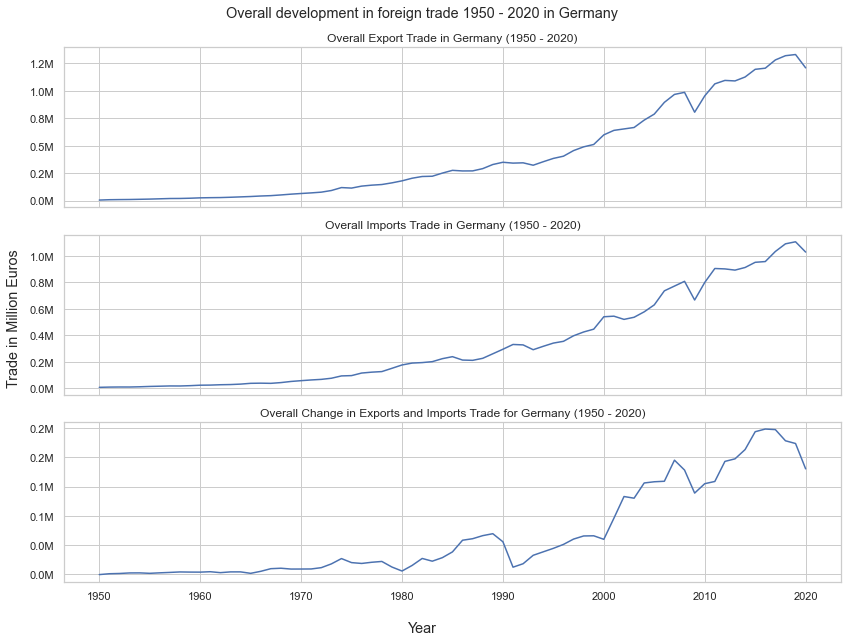

In [16]:
# set plot theme
sns.set_theme(style='whitegrid')


# initialize the matplotlib figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
fig.suptitle('Overall development in foreign trade 1950 - 2020 in Germany')
fig.supxlabel('Year')
fig.supylabel('Trade in Million Euros')


# plot exports trade
sns.lineplot(
    x='Year', y='Exports', 
    data=df, 
    ax=ax1
)
ax1.set(title='Overall Export Trade in Germany (1950 - 2020)', xlabel='', ylabel='')
ax1.yaxis.set_major_formatter(formatter)


# plot imports trade
sns.lineplot(
    x='Year', y='Imports', 
    data=df, 
    ax=ax2
)
ax2.set(title='Overall Imports Trade in Germany (1950 - 2020)', xlabel='', ylabel='')
ax2.yaxis.set_major_formatter(formatter)


# plot change in export and import trade
sns.lineplot(
    x='Year', y='Exp_Imp_Chg', 
    data=df, 
    ax=ax3
)
ax3.set(title='Overall Change in Exports and Imports Trade for Germany (1950 - 2020)', xlabel='', ylabel='')
ax3.yaxis.set_major_formatter(formatter)

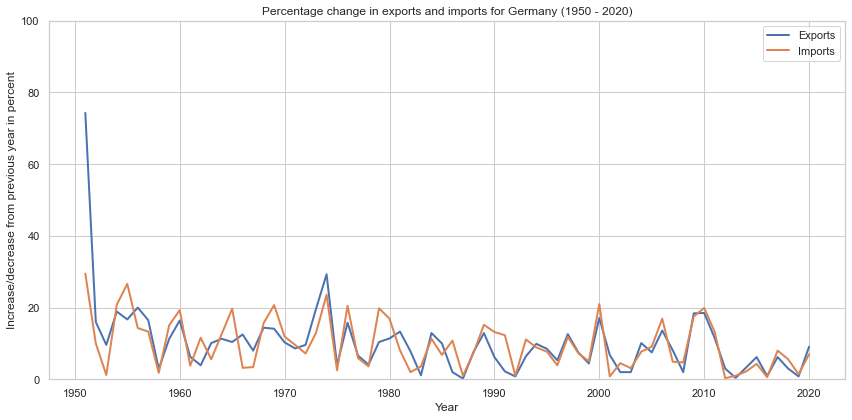

In [17]:
# initialize the matplotlib figure
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 6))


# percentage change in exports and imports
ax1.plot(df['Year'], df['Exports_Pct'], label='Exports', linewidth=2)
ax1.plot(df['Year'], df['Imports_Pct'], label='Imports', linewidth=2)
ax1.set(title='Percentage change in exports and imports for Germany (1950 - 2020)', xlabel='Year', ylabel='Increase/decrease from previous year in percent')
ax1.set_ylim(0, 100)
ax1.legend(loc='upper right')